Practical : 9

(A) Use load_digits dataset from sklearn.datasets to predict handwritten digits using random forest classifier.

(B) Use iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.
1. Measure prediction score using default n_estimators (10)
2. Fine tune your model by changing number of trees in your classifer to determine the best score.

Displaying some sample images from the dataset:


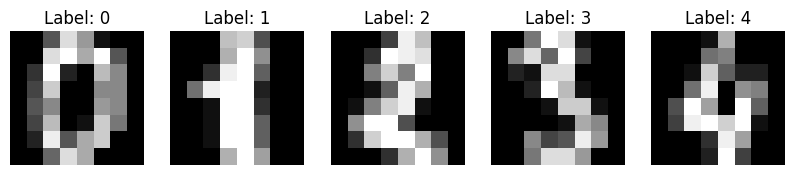

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.data  # Features (images)
y = digits.target  # Labels (digit values)

print("Displaying some sample images from the dataset:")
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
   ax.imshow(digits.images[i], cmap='gray')
   ax.set_title(f"Label: {y[i]}")
   ax.axis('off')
plt.show()

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.59%


In [ ]:
import matplotlib.pyplot as plt

def predict_and_compare(index):
    # Predict the label for the given test sample
    predicted_label = clf.predict([X_test[index]])[0]
    actual_label = y_test[index]

    # Create subplots to display actual and predicted images side by side
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    # Show the actual image with the true label
    axes[0].imshow(digits.images[index + len(X_train)], cmap='gray')
    axes[0].set_title(f"Actual Label: {actual_label}")
    axes[0].axis('off')

    # Show the predicted image with the predicted label
    axes[1].imshow(digits.images[index + len(X_train)], cmap='gray')
    axes[1].set_title(f"Predicted Label: {predicted_label}")
    axes[1].axis('off')

    # Display the images
    plt.show()

    # Check if prediction is correct and calculate accuracy for this sample
    correct = predicted_label == actual_label
    accuracy_single = 100.0 if correct else 0.0

    # Print accuracy and correctness message
    print(f"Prediction Accuracy: {accuracy_single:.2f}%")
    print("Prediction was correct!" if correct else "Prediction was incorrect.")


Enter an index: 5


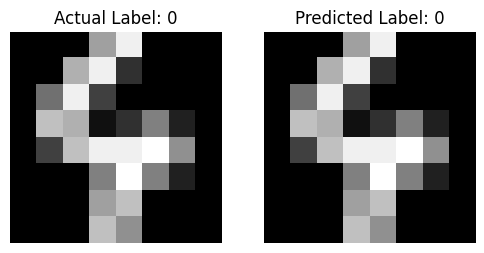

Prediction Accuracy: 100.00%
Prediction was correct!


In [ ]:
index=int(input("Enter an index: ".format(len(X_test)-1)))
predict_and_compare(index)

Cross-validation scores with n_estimators=10: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Average cross-validation score with n_estimators=10: 0.9667
Best n_estimators: 11
Best cross-validation score: 0.9667


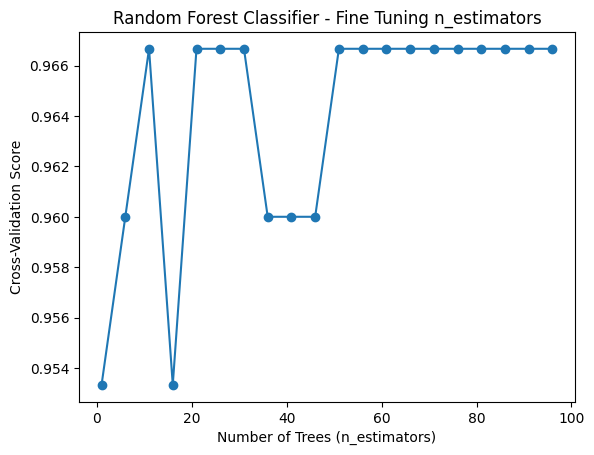

In [ ]:
#iris flower dataset from sklearn.datasets to predict flower species using random forest classifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
X, y = data.data, data.target

# Initialize a Random Forest Classifier with default n_estimators (10)
rf_clf_default = RandomForestClassifier(n_estimators=10, random_state=42)

# Measure the prediction score using cross-validation
cv_scores_default = cross_val_score(rf_clf_default, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores with n_estimators=10: {cv_scores_default}")
print(f"Average cross-validation score with n_estimators=10: {np.mean(cv_scores_default):.4f}")

# Fine-tune the model by testing different values of n_estimators
n_estimators_range = range(1, 101, 5)  # Testing from 1 to 100 trees, in steps of 5
cv_scores = []

for n_estimators in n_estimators_range:
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf_clf, X, y, cv=5)
    cv_scores.append(np.mean(scores))

# Find the best number of trees based on the cross-validation score
best_n_estimators = n_estimators_range[np.argmax(cv_scores)]
best_score = max(cv_scores)
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best cross-validation score: {best_score:.4f}")

# Plotting the results
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Cross-Validation Score")
plt.title("Random Forest Classifier - Fine Tuning n_estimators")
plt.show()
